In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import tensorflow.keras.preprocessing.text as tfkpt
from tensorflow.keras.preprocessing.text import Tokenizer
import csv
import json
from tensorflow.keras.models import model_from_json

In [2]:
headers = ['name' , 'score' , 'text']

In [3]:
movie_train = pd.read_csv('./../assets/cleaned_movie.csv' , names = headers)
movie_train = movie_train[:50000]
movie_train

,name,score,text
0,Hustle & Flow,100,The writing; acting and filmmaking make Hustl...
1,Hustle & Flow,91,The home-studio recording sequences in Hustle...
2,Hustle & Flow,90,The performances are accomplished; but the re...
3,Hustle & Flow,90,In a world of movies that try far too hard to...
4,Hustle & Flow,88,The feel-good movie of the summer. And the so...
...,...,...,...
49995,We Are Your Friends,25,Perhaps it's for the best that We Are Your Fr...
49996,We Are Your Friends,25,The movie takes something primally appealing ...
49997,Toy Soldiers,75,
49998,Toy Soldiers,70,Toy Soldiers is a crisp; suspenseful thriller...


#### Above read dataanime for to train reviews

In [4]:
print(f"Data Shape: {movie_train}")

Data Shape:                       name  score  \
0            Hustle & Flow    100   
1            Hustle & Flow     91   
2            Hustle & Flow     90   
3            Hustle & Flow     90   
4            Hustle & Flow     88   
...                    ...    ...   
49995  We Are Your Friends     25   
49996  We Are Your Friends     25   
49997         Toy Soldiers     75   
49998         Toy Soldiers     70   
49999         Toy Soldiers     70   

                                                    text  
0       The writing; acting and filmmaking make Hustl...  
1       The home-studio recording sequences in Hustle...  
2       The performances are accomplished; but the re...  
3       In a world of movies that try far too hard to...  
4       The feel-good movie of the summer. And the so...  
...                                                  ...  
49995   Perhaps it's for the best that We Are Your Fr...  
49996   The movie takes something primally appealing ...  
49997       

In [5]:
print(movie_train.columns)

Index(['name', 'score', 'text'], dtype='object')


In [6]:
ranked_movie = movie_train[['text', 'score']].sort_values(by='score')

In [7]:
ranked_movie

,text,score
8852,In the final analysis; The Curse of Michael M...,0
35839,The would-be noir Beyond a Rea sonable Doubt ...,0
44109,,0
44108,This may be the only would-be blockbuster tha...,0
33009,Cheap; preposterous and mind-bendingly dreadful.,0
...,...,...
1603,Iwai's ambitious drama is strikingly shot; po...,100
11987,Tight as a drum; glamorous and exquisitely fu...,100
11953,The extraordinary quality of White's script a...,100
13304,I've watched Sleepwalk With Me twice now; eac...,100


In [8]:
ranked_movie['score'].median()

50.0

In [9]:
ranked_movie['score'].mode()

0    50
dtype: int64

In [10]:
ranked_movie['score'].mean()

54.22128

#### Mean and Median Score is very close to lowest score so we use regression 

In [11]:
regression_movie = ranked_movie['score'].value_counts()

In [12]:
ra_movie = ranked_movie.groupby(['score'],as_index=False).count()
ra_movie

,score,text
0,0,1085
1,1,1
2,4,2
3,5,7
4,6,3
...,...,...
83,91,363
84,92,3
85,94,1
86,95,6


#### math calculation of positive, negative and natural range

In [13]:
range = 100 - 0
range

100

In [14]:
round(range/3)

33

#### Math calculation says use 33 for each situation.
#### We check it as below analysis

In [15]:
ra_movie = ra_movie.rename(columns={'score': 'points', 'text': 'count'})


In [16]:
ra_movie

,points,count
0,0,1085
1,1,1
2,4,2
3,5,7
4,6,3
...,...,...
83,91,363
84,92,3
85,94,1
86,95,6


In [17]:
X = ra_movie['points'].values
y = ra_movie['count'].values
X

array([  0,   1,   4,   5,   6,   8,   9,  10,  11,  12,  13,  14,  15,
        16,  17,  18,  20,  21,  22,  23,  25,  27,  28,  29,  30,  31,
        32,  33,  34,  35,  36,  37,  38,  39,  40,  41,  42,  43,  44,
        45,  46,  48,  49,  50,  51,  52,  53,  54,  55,  57,  58,  59,
        60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,  71,  72,
        73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,  84,  85,
        86,  87,  88,  89,  90,  91,  92,  94,  95, 100])

In [18]:
X=X.reshape(-1,1)
X

array([[  0],
       [  1],
       [  4],
       [  5],
       [  6],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 25],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
       [ 71],
       [ 72],
       [ 73],
       [ 74],
       [ 75],
       [ 76],
       [ 77],
       [ 78],
      

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

In [20]:
x_train, x_test, y_train, y_test = train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=50)
print(f"X_train shape {x_train.shape}")
print(f"y_train shape {y_train.shape}")
print(f"X_test shape {x_test.shape}")
print(f"y_test shape {y_test.shape}")
print(y_test)

X_train shape (61, 1)
y_train shape (61,)
X_test shape (27, 1)
y_test shape (27,)
[   2    4    6   75    2    1 2218    1   87    1 2332   31    2    2
    1    2   50    1    3    3 5444 3724    1    2 3773    4 1502]


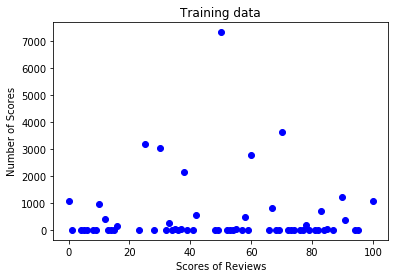

In [21]:
%matplotlib inline
plt.scatter(x_train,y_train,color='blue')
plt.xlabel('Scores of Reviews' )
plt.ylabel('Number of Scores')
plt.title('Training data')
plt.show()

In [22]:
lm = LinearRegression()
lm.fit(x_train,y_train)
y_predict = lm.predict(x_test)
print(f"Train accuracy {round(lm.score(x_train,y_train)*100,2)} %")
print(f"Test accuracy {round(lm.score(x_test,y_test)*100,2)} %")

Train accuracy 0.0 %
Test accuracy -2.22 %


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

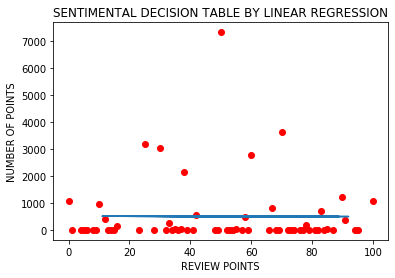

In [23]:
plt.scatter(x_train,y_train,color='red')
plt.plot(x_test,y_predict)
plt.xlabel("REVIEW POINTS")
plt.ylabel("NUMBER OF POINTS")
plt.title("SENTIMENTAL DECISION TABLE BY LINEAR REGRESSION")
plt.plot

#### We check it with Polynominal Regression

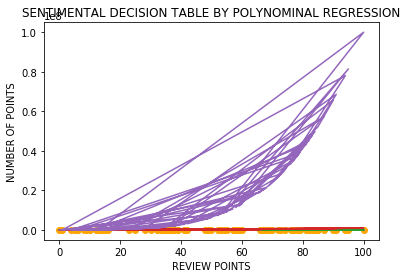

In [24]:
poly = PolynomialFeatures(degree = 4)
X_poly = poly.fit_transform(x_train)
poly.fit(X_poly,y_train)
%matplotlib inline
plt.scatter(x_train,y_train,color='orange')
plt.plot(x_train, poly.fit_transform(x_train))
plt.xlabel("REVIEW POINTS")
plt.ylabel("NUMBER OF POINTS")
plt.title("SENTIMENTAL DECISION TABLE BY POLYNOMINAL REGRESSION")
plt.show()

In [25]:
def create_sentiment(int):
    if int >=0 and int<35:
        return 0
    if int>=35 and int<50:
        return 1
    if int>=50 and int<101:
        return 2

### Above the decision of breakpoints are given 

In [26]:
ranked_movie['sentiment'] = ranked_movie['score'].apply(create_sentiment)

In [27]:
ranked_movie

,text,score,sentiment
8852,In the final analysis; The Curse of Michael M...,0,0
35839,The would-be noir Beyond a Rea sonable Doubt ...,0,0
44109,,0,0
44108,This may be the only would-be blockbuster tha...,0,0
33009,Cheap; preposterous and mind-bendingly dreadful.,0,0
...,...,...,...
1603,Iwai's ambitious drama is strikingly shot; po...,100,2
11987,Tight as a drum; glamorous and exquisitely fu...,100,2
11953,The extraordinary quality of White's script a...,100,2
13304,I've watched Sleepwalk With Me twice now; eac...,100,2


In [28]:
def clean_text(input):
    input = str(input)
    return input.replace(',', ';')

In [29]:
ranked_movie['text'] = ranked_movie['text'].apply(clean_text)

In [30]:
ranked_movie

,text,score,sentiment
8852,In the final analysis; The Curse of Michael M...,0,0
35839,The would-be noir Beyond a Rea sonable Doubt ...,0,0
44109,,0,0
44108,This may be the only would-be blockbuster tha...,0,0
33009,Cheap; preposterous and mind-bendingly dreadful.,0,0
...,...,...,...
1603,Iwai's ambitious drama is strikingly shot; po...,100,2
11987,Tight as a drum; glamorous and exquisitely fu...,100,2
11953,The extraordinary quality of White's script a...,100,2
13304,I've watched Sleepwalk With Me twice now; eac...,100,2


In [31]:
ranked_movie.to_csv('movie_review.csv')

In [32]:
movie_df = pd.read_csv('movie_review.csv')

In [33]:
movie_df

,Unnamed: 0,text,score,sentiment
0,8852,In the final analysis; The Curse of Michael M...,0,0
1,35839,The would-be noir Beyond a Rea sonable Doubt ...,0,0
2,44109,,0,0
3,44108,This may be the only would-be blockbuster tha...,0,0
4,33009,Cheap; preposterous and mind-bendingly dreadful.,0,0
...,...,...,...,...
49995,1603,Iwai's ambitious drama is strikingly shot; po...,100,2
49996,11987,Tight as a drum; glamorous and exquisitely fu...,100,2
49997,11953,The extraordinary quality of White's script a...,100,2
49998,13304,I've watched Sleepwalk With Me twice now; eac...,100,2


In [34]:
movie_df.columns=['Unnamed: 0', 'text' , 'score' , 'sentiment']
movie_training_df = movie_df[['text', 'sentiment']].dropna()
movie_training_df.sample(5)

,text,sentiment
16455,Directed by Ernest Dickerson; the film looks ...,1
25636,,2
35388,The style of the filmmaking; the freewheeling...,2
37553,This is a film that encapsulates the anxiety ...,2
28909,Epitomizes the kind of somber; aesthetically ...,2


In [35]:
movie_y = movie_training_df.sentiment
print(movie_y)

0        0
1        0
2        0
3        0
4        0
        ..
49995    2
49996    2
49997    2
49998    2
49999    2
Name: sentiment, Length: 50000, dtype: int64


In [36]:
movie_x = movie_training_df.text
print(movie_x)

0         In the final analysis; The Curse of Michael M...
1         The would-be noir Beyond a Rea sonable Doubt ...
2                                                         
3         This may be the only would-be blockbuster tha...
4         Cheap; preposterous and mind-bendingly dreadful.
                               ...                        
49995     Iwai's ambitious drama is strikingly shot; po...
49996     Tight as a drum; glamorous and exquisitely fu...
49997     The extraordinary quality of White's script a...
49998     I've watched Sleepwalk With Me twice now; eac...
49999     The writing; acting and filmmaking make Hustl...
Name: text, Length: 50000, dtype: object


In [37]:
movie_training_df.describe()

,sentiment
count,50000.000000
mean,1.410940
std,0.836279
min,0.000000
25%,1.000000
50%,2.000000
75%,2.000000
max,2.000000


In [38]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(movie_x)

In [39]:
movie_x = tokenizer.texts_to_sequences(movie_x)

In [40]:
movie_x = tokenizer.sequences_to_matrix(movie_x)
movie_x

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [41]:
print(type(movie_x))

<class 'numpy.ndarray'>


In [42]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation


In [43]:
print ("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))


Num GPUs Available:  0


In [44]:
movie_y = keras.utils.to_categorical(movie_y,3)

In [45]:
movie_y

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

#### x and y axis created for machine learning, now it is time for layers between input and output

In [46]:
model = Sequential()

#### 1st layer act Sigmoid drop 1 at 10%

In [47]:
model.add(Dense(1055, activation='sigmoid'))
model.add(Dropout(0.1))

#### 2nd layer act Rectified Linear Drop 1 at 20%

In [48]:
model.add(Dense(755, activation = 'relu'))
model.add(Dropout(0.2))

#### 3rd layer act Linear Drop 1 at 30%

In [49]:
model.add(Dense(555, activation = 'linear'))
model.add(Dropout(0.30))

#### 4th layer act softsign no drop

In [50]:
model.add(Dense(33, activation = 'softsign'))


#### 5th layer act softmax no drop

In [51]:
model.add(Dense(3, activation = 'softmax'))

#### Compile the model

In [52]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [53]:
model.fit(
    movie_x, movie_y,
    batch_size=35,
    epochs=7,
    verbose=1,
    validation_split=0.2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/7
40000/40000 [==============================] - 221s 6ms/sample - loss: 0.9913 - accuracy: 0.5484 - val_loss: 0.7347 - val_accuracy: 1.0000
Epoch 2/7
40000/40000 [==============================] - 222s 6ms/sample - loss: 0.9885 - accuracy: 0.5458 - val_loss: 0.6746 - val_accuracy: 1.0000
Epoch 3/7
40000/40000 [==============================] - 222s 6ms/sample - loss: 0.9862 - accuracy: 0.5475 - val_loss: 0.6428 - val_accuracy: 1.0000
Epoch 4/7
40000/40000 [==============================] - 223s 6ms/sample - loss: 0.9838 - accuracy: 0.5475 - val_loss: 0.3278 - val_accuracy: 0.9773
Epoch 5/7
40000/40000 [==============================] - 223s 6ms/sample - loss: 0.8708 - accuracy: 0.6254 - val_loss: 0.3290 - val_accuracy: 0.9586
Epoch 6/7
40000/40000 [==============================] - 227s 6ms/sample - loss: 0.7982 - accuracy: 0.6650 - val_loss: 0.4444 - val_accuracy: 0.9535
Epoch 7/7
40000/40000 [==============================] -

In [54]:
movie_model_1 = model.to_json()
with open('movie_model_1.json', 'w') as json_file:
    json_file.write(movie_model_1)
model.save_weights('movie_model_1.h5')

In [55]:
movie_dict_1 = tokenizer.word_index
with open('movie_dict_1.json', 'w') as d:
    json.dump(movie_dict_1, d)